## Phishing website detection 


In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

### importing dataset and dataset analysis

In [2]:
df = pd.read_csv("/dataset/phishing_detection.csv")

In [3]:
df.head()
# result is the target attribute

id  having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0   1                 -1           1                   1                 1   
1   2                  1           1                   1                 1   
2   3                  1           0                   1                 1   
3   4                  1           0                   1                 1   
4   5                  1           0                  -1                 1   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0                        -1             -1                 -1              -1   
1                         1             -1                  0               1   
2                         1             -1                 -1              -1   
3                         1             -1                 -1              -1   
4                         1             -1                  1               1   

   Domain_registeration_length  ...  popUpWindow  Iframe  age_of_domain  \
0                           -1  ...            1       1             -1   
1                           -1  ...            1       1             -1   
2                           -1  ...            1       1              1   
3                            1  ...            1       1             -1   
4                           -1  ...           -1       1             -1   

   DNSRecord  web_traffic  Page_Rank  Google_Index  Links_pointing_to_page  \
0         -1           -1         -1             1                       1   
1         -1            0         -1             1                       1   
2         -1            1         -1             1                       0   
3         -1            1         -1             1                      -1   
4         -1            0         -1             1                       1   

   Statistical_report  Result  
0                  -1      -1  
1                   1      -1  
2                  -1      -1  
3                   1      -1  
4                   1       1  

[5 rows x 32 columns]

In [4]:
df.shape

(15819, 32)

In [5]:
df.columns

Index(['id', 'having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWindow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           15819 non-null  int64
 1   having_IP_Address            15819 non-null  int64
 2   URL_Length                   15819 non-null  int64
 3   Shortining_Service           15819 non-null  int64
 4   having_At_Symbol             15819 non-null  int64
 5   double_slash_redirecting     15819 non-null  int64
 6   Prefix_Suffix                15819 non-null  int64
 7   having_Sub_Domain            15819 non-null  int64
 8   SSLfinal_State               15819 non-null  int64
 9   Domain_registeration_length  15819 non-null  int64
 10  Favicon                      15819 non-null  int64
 11  port                         15819 non-null  int64
 12  HTTPS_token                  15819 non-null  int64
 13  Request_URL                  15819 non-null  i

In [7]:
# no null values
df.isnull().sum()

id                             0
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWindow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

<Axes: xlabel='Result', ylabel='count'>

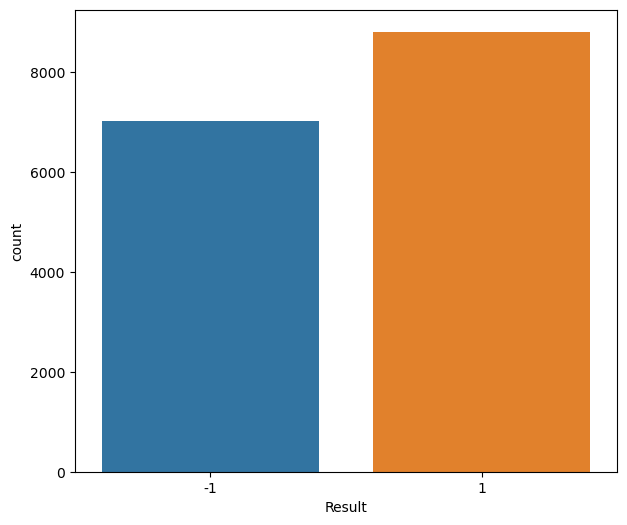

In [8]:
plt.figure(figsize=(7,6))
# count numbers of class records for 'Result' target attribute
sns.countplot(x='Result', data = df)

In [9]:
df['Result'].value_counts()

Result
 1    8801
-1    7018
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [11]:
# input attribute and target attribute
X = df.iloc[: , :-1]
y = df.iloc[:, -1:]

In [12]:
y

Result
0          -1
1          -1
2          -1
3          -1
4           1
...       ...
15814      -1
15815      -1
15816       1
15817      -1
15818      -1

[15819 rows x 1 columns]

In [13]:
# train test split with test size as 0.25 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## support vector classifier

In [14]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, gamma= 1, kernel='sigmoid', random_state=42)


In [15]:
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='sigmoid', random_state=42)

In [16]:
prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print('Accuracy of training data: ', svc_model.score(X_train, y_train))
print('Accuracy of validation data: ',svc_model.score(X_test, y_test))

Accuracy of training data:  0.5580748482805125
Accuracy of validation data:  0.5512010113780025


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
# generating classification report
print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1775
           1       0.55      1.00      0.71      2180

    accuracy                           0.55      3955
   macro avg       0.28      0.50      0.36      3955
weighted avg       0.30      0.55      0.39      3955



## Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lgr = LogisticRegression(random_state=0)
lgr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [20]:
y_pre_test = lgr.predict(X_test)
y_pre_train = lgr.predict(X_train)

In [21]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pre_train, y_train)
test_accurry = accuracy_score(y_pre_test, y_test)
print('Accuracy for train dataset for logistic reg : ', train_accurry)
print('Accuracy for test dataset for logistic reg : ', test_accurry)


Accuracy for train dataset for logistic reg :  0.9232973701955496
Accuracy for test dataset for logistic reg :  0.9185840707964602


In [22]:
confusion_matrix(y_test, y_pre_test )

array([[1600,  175],
       [ 147, 2033]], dtype=int64)

## decision tree clasifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [25]:
clf.score(X_train, y_train)

1.0

In [26]:
from sklearn import metrics 

print("Confusion matrix:")
print("",conf_matrix)
print("")

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.956763590391909


### visualize decision tree

In [29]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [30]:
dot_data = StringIO()
export_graphviz(clf, out_file= dot_data, feature_names=list(X.columns), filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [31]:
Image(graph.create_png())

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
# classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.96      0.94      0.95      1775
           1       0.96      0.97      0.96      2180

    accuracy                           0.96      3955
   macro avg       0.96      0.96      0.96      3955
weighted avg       0.96      0.96      0.96      3955



## K-nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

 choosing the best values of k (neighbours)

In [34]:
neighbour = []
accuracy = []
for k in range(1, 20):
  k_near = KNeighborsClassifier(n_neighbors=k)
  k_near.fit(X,y)
  Y_pre_test = k_near.predict(X_test)
  Y_pre_train = k_near.predict(X_train)
  test_accurry = accuracy_score(Y_pre_test, y_test)
  neighbour.append(k)
  accuracy.append(test_accurry)

Text(0, 0.5, 'accuracy')

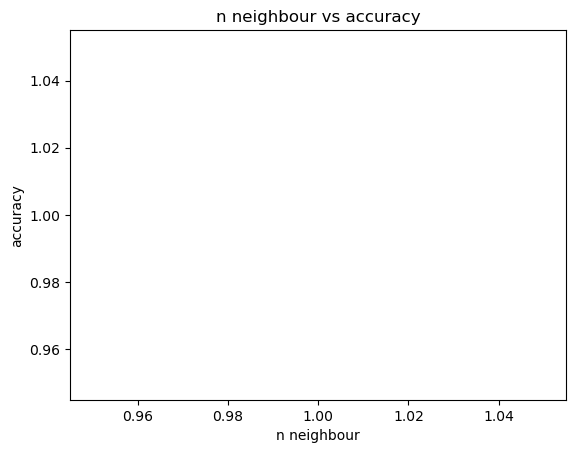

In [35]:
# plotting for n neighbour vs accuracy

plt.plot(neighbour, accuracy)
plt.title('n neighbour vs accuracy')
plt.xlabel('n neighbour')
plt.ylabel('accuracy')

we can see the accuracy is highest for n_neighbours = 1

#### KNN with n_neighbour = 1

In [36]:
k_near = KNeighborsClassifier(n_neighbors=1)
k_near.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
Y_pre_test = k_near.predict(X_test)
Y_pre_train = k_near.predict(X_train)

In [38]:
Y_pre_test = k_near.predict(X_test.values)
Y_pre_train = k_near.predict(X_train.values)

In [39]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(Y_pre_train, y_train)
test_accurry = accuracy_score(Y_pre_test, y_test)
print('Accuracy for train dataset for K-neariest : ', train_accurry)
print('Accuracy for test dataset for K-neariest : ', test_accurry)

Accuracy for train dataset for K-neariest :  1.0
Accuracy for test dataset for K-neariest :  0.6750948166877371


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, Y_pre_test ))

              precision    recall  f1-score   support

          -1       0.63      0.65      0.64      1775
           1       0.71      0.69      0.70      2180

    accuracy                           0.68      3955
   macro avg       0.67      0.67      0.67      3955
weighted avg       0.68      0.68      0.68      3955



In [41]:
confusion_matrix(y_test, Y_pre_test )

array([[1159,  616],
       [ 669, 1511]], dtype=int64)

<Axes: >

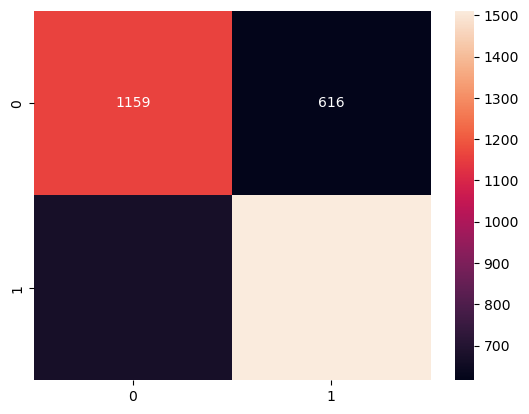

In [42]:
sns.heatmap(confusion_matrix(y_test, Y_pre_test), annot = True, fmt='0.0f')

## Naive Bayes

In [43]:
from sklearn.naive_bayes import  BernoulliNB

In [44]:
# Bernoullis Navaive bayes classifier
nvb = BernoulliNB()
nvb.fit(X_train,y_train)

BernoulliNB()

In [45]:
y_pre_test = nvb.predict(X_test)
y_pre_train = nvb.predict(X_train)

In [46]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pre_train, y_train)
test_accurry = accuracy_score(y_pre_test, y_test)
print('Accuracy for train dataset for naive bayes  reg : ', train_accurry)
print('Accuracy for test dataset for naive bayes reg : ', test_accurry)

Accuracy for train dataset for naive bayes  reg :  0.9100640593391773
Accuracy for test dataset for naive bayes reg :  0.9059418457648546


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pre_test ))


              precision    recall  f1-score   support

          -1       0.89      0.90      0.90      1775
           1       0.92      0.91      0.91      2180

    accuracy                           0.91      3955
   macro avg       0.90      0.91      0.91      3955
weighted avg       0.91      0.91      0.91      3955



In [48]:
confusion_matrix(y_test, y_pre_test)

array([[1602,  173],
       [ 199, 1981]], dtype=int64)

<Axes: >

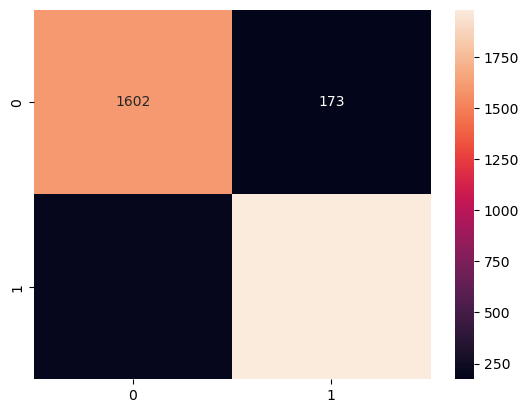

In [49]:
sns.heatmap(confusion_matrix(y_test, y_pre_test), annot = True, fmt='0.0f')

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
# fittin the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# prediction on validation dataset
y_pred = rfc.predict(X_test)

In [52]:
# prediction on training dataset
y_pred_train = rfc.predict(X_train)

In [53]:
from sklearn import metrics
print("Train ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred_train))

Train ACCURACY OF THE MODEL:  1.0


In [54]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9696586599241467


In [55]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97      1775
           1       0.97      0.98      0.97      2180

    accuracy                           0.97      3955
   macro avg       0.97      0.97      0.97      3955
weighted avg       0.97      0.97      0.97      3955



In [56]:
confusion_matrix(y_test, y_pred)

array([[1709,   66],
       [  54, 2126]], dtype=int64)

<Axes: >

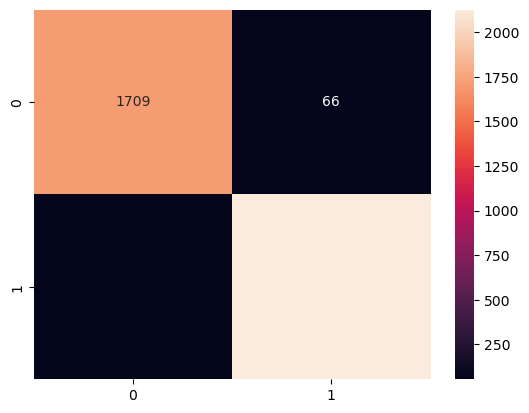

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

## Building Hybrid machine learning model

In [57]:
model_1 = SVC()
model_2 = KNeighborsClassifier(n_neighbors=1)
model_3 = DecisionTreeClassifier()
model_4 = LogisticRegression(random_state=0)
model_5 =BernoulliNB()
model_6 = RandomForestClassifier(n_estimators=100)

## Hybrid Ensembler

In [59]:

ensemble = VotingClassifier(estimators=[('Decision Tree', model_3), ('naive bayes', model_5),
                                        ('Random Forest', model_6),], voting='hard')


In [60]:
ensemble.fit(X_train, y_train)
y_pred_test = ensemble.predict(X_test)
y_pred_train = ensemble.predict(X_train)

In [61]:
ensemble.fit(X_train, y_train)
y_pred_test = ensemble.predict(X_test.values)
y_pred_train = ensemble.predict(X_train.values)

In [62]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(ensemble, open(filename, 'wb'))

In [63]:
print(X_test.values)

[[9060   -1    1 ...    1    0   -1]
 [ 170    1   -1 ...    1    0    1]
 [5332    1   -1 ...    1    0    1]
 ...
 [3560   -1    1 ...    1    1   -1]
 [7402    1    1 ...    1    1    1]
 [3781    1    1 ...   -1    1    1]]


In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# True Positives, False Positives, True Negatives, False Negatives
TN, FP, FN, TP = conf_matrix.ravel()

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = precision_score(y_test, y_pred_test)

# Recall
recall = recall_score(y_test, y_pred_test)

# Specificity
specificity = TN / (TN + FP)

# F1 Score
f1 = f1_score(y_test, y_pred_test)

print("Confusion matrix:")
print("",conf_matrix)
print("")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1)


Confusion matrix:
 [[1324   55]
 [  42 1743]]

Accuracy: 0.9693426042983565
Precision: 0.9694104560622915
Recall: 0.9764705882352941
Specificity: 0.9601160261058739
F1 Score: 0.9729277142059727


Metrics for Hybrid Model 1:
Accuracy: 0.9370417193426043
Precision: 0.9079002957329954
Recall: 0.9857798165137615
Specificity: 0.8771830985915493
F1 Score: 0.9452386188695844

Metrics for Hybrid Model 2:
Accuracy: 0.9678887484197218
Precision: 0.9668030923146885
Recall: 0.9752293577981651
Specificity: 0.9588732394366197
F1 Score: 0.9709979447362412


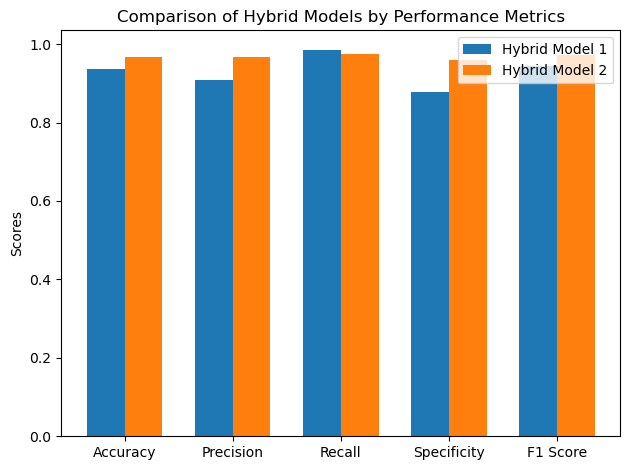

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import pickle

# Initialize models
model_1 = SVC()
model_2 = KNeighborsClassifier(n_neighbors=1)
model_3 = DecisionTreeClassifier()
model_4 = LogisticRegression(random_state=0)
model_5 = BernoulliNB()
model_6 = RandomForestClassifier(n_estimators=100)

# Hybrid Model 1: Logistic Regression, SVC, and Decision Tree
hybrid_1 = VotingClassifier(estimators=[
    ('Logistic Regression', model_4),
    ('SVC', model_1),
    ('Decision Tree', model_3)
], voting='hard')

# Hybrid Model 2: Decision Tree, Naive Bayes, and Random Forest
hybrid_2 = VotingClassifier(estimators=[
    ('Decision Tree', model_3),
    ('Naive Bayes', model_5),
    ('Random Forest', model_6)
], voting='hard')

# Fit the models
hybrid_1.fit(X_train, y_train)
hybrid_2.fit(X_train, y_train)

# Predict with the models
y_pred_test_hybrid_1 = hybrid_1.predict(X_test)
y_pred_test_hybrid_2 = hybrid_2.predict(X_test)

# Calculate metrics
def calculate_metrics(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = conf_matrix.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = TN / (TN + FP)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, specificity, f1

metrics_hybrid_1 = calculate_metrics(y_test, y_pred_test_hybrid_1)
metrics_hybrid_2 = calculate_metrics(y_test, y_pred_test_hybrid_2)

# Print metrics
metric_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score']
print("Metrics for Hybrid Model 1:")
for name, value in zip(metric_names, metrics_hybrid_1):
    print(f"{name}: {value}")

print("\nMetrics for Hybrid Model 2:")
for name, value in zip(metric_names, metrics_hybrid_2):
    print(f"{name}: {value}")

# Compare metrics with a bar graph
x = np.arange(len(metric_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, metrics_hybrid_1, width, label='Hybrid Model 1')
rects2 = ax.bar(x + width/2, metrics_hybrid_2, width, label='Hybrid Model 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Hybrid Models by Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()

fig.tight_layout()

plt.show()
